# 简介
THUCTC(THU Chinese Text Classification)由清华大学自然语言处理实验室推出的中文文本分类工具包，能够自动高效地实现用户自定义的文本分类语料的训练和测评、分类功能。文本分类通常包括特征选取、特征降维、分类模型学习三个步骤。
在THUCTC中选取二字串bigram作为特征单元，特征降维方法为Chi-square，权重计算方法为tfidf，分类模型使用的是LibSVM或LibLinear。THUCTC对于开放领域的长文本具有良好的普适性，不依赖于任何中文分词工具的性能，具有准确率高、测试速度快的优点。

http://thuctc.thunlp.org/


In [1]:
import os

def getFilePathList(rootDirPath):
    filePath_list = []
    for walk in os.walk(rootDirPath):
        part_filePath_list = [os.path.join(walk[0],file) for file in walk[2]]
        filePath_list.extend(part_filePath_list)
    return filePath_list

filePath_list = getFilePathList('THUCNews')
len(filePath_list)

836075

## 获取样本标签

In [ ]:
label_list = []
for filePath in filePath_list:
    label = filePath.split('\\')[1]
    label_list.append(label)
len(label_list)

## 统计标签计数

In [ ]:
import pandas as pd
pd.value_counts(label_list)

## 调用pickle 保存label_list
####  pickle 库的dump方法可以将python中对象持久化为二进制文件，二进制文件的加载速度非常快，避免内存溢出，每读取一定数量的文件就利用pickle库的dump方法保存。

In [ ]:
import pickle
with open('label_list.pickle','wb') as file:
    pickle.dump(label_list, file)

## 获取所有的样本内容，保存content_list

In [ ]:
import time
import pickle
import re

def getFile(filePath):
    with open(filePath, encoding='utf-8') as file:
        fileStr = ''.join(file.readlines(1000))
    return fileStr

interval = 20000
n_samples = len(label_list)
startTime = time.time()
directory_name = 'content_list'

if not os.path.isdir(directory_name):
    os.mkdir(directory_name)
for i in range(0, n_samples, interval):
    startIndex = i
    endIndex = i + interval
    content_list = []
    print('%06d-%06d start' % (startIndex, endIndex))
    for filePath in filePath_list[startIndex : endIndex]:
        fileStr = getFile(filePath)
        content = re.sub('\s+',' ', fileStr) ##空格和tab键
        content_list.append(content) ### content_list = [[file1] , [file2] , [file3] ,...]
    save_fileName = directory_name + '/%06d-%06d.pickle' %(startIndex, endIndex)
    with open(save_fileName, 'wb') as file:
        pickle.dump(content_list, file)
    used_time = time.time() - startTime
    print('%06d-%06d used time : %.2f seconds' %(startIndex, endIndex, used_time))

## 加载数据

In [2]:
import time
import pickle
import os

startTime = time.time()
contentListPath_list = getFilePathList('content_list')
content_list = []
for filePath in contentListPath_list:
    with open(filePath, 'rb') as file:
        part_content_list = pickle.load(file)
    content_list.extend(part_content_list) ## 
with open('label_list.pickle', 'rb') as file:
    label_list = pickle.load(file)
used_time = time.time() - startTime
print('used time:%.2f seconds' % used_time)
sample_size = len(content_list)
print('length of content_list, also called sample size %d' % sample_size)


used time:5.79 seconds
length of content_list, also called sample size 836075


In [3]:
print(content_list[0:2])  ##content_list = ['text1', 'text2', 'text3'..]
print('\n')
print(label_list[0:2])

['马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军 记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有摆脱雨水的困扰。7月31日下午6点，国奥队的日常训练再度受到大雨的干扰，无奈之下队员们只慢跑了25分钟就草草收场。 31日上午10点，国奥队在奥体中心外场训练的时候，天就是阴沉沉的，气象预报显示当天下午沈阳就有大雨，但幸好队伍上午的训练并没有受到任何干扰。 下午6点，当球队抵达训练场时，大雨已经下了几个小时，而且丝毫没有停下来的意思。抱着试一试的态度，球队开始了当天下午的例行训练，25分钟过去了，天气没有任何转好的迹象，为了保护球员们，国奥队决定中止当天的训练，全队立即返回酒店。 在雨中训练对足球队来说并不是什么稀罕事，但在奥运会即将开始之前，全队变得“娇贵”了。在沈阳最后一周的训练，国奥队首先要保证现有的球员不再出现意外的伤病情况以免影响正式比赛，因此这一阶段控制训练受伤、控制感冒等疾病的出现被队伍放在了相当重要的位置。而抵达沈阳之后，中后卫冯萧霆就一直没有训练，冯萧霆是7月27日在长春患上了感冒，因此也没有参加29日跟塞尔维亚的热身赛。队伍介绍说，冯萧霆并没有出现发烧症状，但为了安全起见，这两天还是让他静养休息，等感冒彻底好了之后再恢复训练。由于有了冯萧霆这个例子，因此国奥队对雨中训练就显得特别谨慎，主要是担心球员们受凉而引发感冒，造成非战斗减员。而女足队员马晓旭在热身赛中受伤导致无缘奥运的前科，也让在沈阳的国奥队现在格外警惕，“训练中不断嘱咐队员们要注意动作，我们可不能再出这样的事情了。”一位工作人员表示。 从长春到沈阳，雨水一路伴随着国奥队，“也邪了，我们走到哪儿雨就下到哪儿，在长春几次训练都被大雨给搅和了，没想到来沈阳又碰到这种事情。”一位国奥球员也对雨水的“青睐”有些不解。 ', '商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典 多曼来了，瑞典来了，商瑞华首战求3分的信心也来了。距离首战72小时当口，中国女足彻底从“恐瑞症”当中获得解脱，因为商瑞华已经找到了瑞典人的软肋。 找到软肋，保密 4月20日奥运会分组抽签结果出来后，中国姑娘就把瑞典锁定为关乎奥运成败的头号劲敌，因为除了浦玮等个别老将之外，现役女足将士竟然没有人尝过击败瑞典的滋味。在中瑞两队共计15次交锋的历史上，中国队6胜3平6负与瑞典队平分秋色，但从2001年起至今近8年时间，中国在同瑞典连续5

## 词汇表
### 1. 制作词汇表
内容列表content_list 中的元素是每篇文章内容，数据类型为字符串。
对所有文章内容中的字做统计计数，出现次数排名前10000的字赋值给变量vocabulary_list

In [ ]:
from collections import Counter

def getVocabularyList(content_list, vocabulary_size):
    allContent_str = ''.join(content_list)
    counter = Counter(allContent_str)
    vocabulary_list = [k[0] for k in counter.most_common(vocabulary_size)]
    return ['PAD'] + vocabulary_list

startTime = time.time()
vocabulary_list = getVocabularyList(content_list, 10000)
used_time = time.time() - startTime
print('used time : %.2f seconds' % used_time)

In [ ]:
vocabulary_list[0:3]

### 2. 保存词汇表

In [ ]:
import pickle
with open('vocabulary_list.pickle','wb') as file:
    pickle.dump(vocabulary_list, file)

### 3. 加载词汇表
每次制作词汇表都得花费90秒，完成制作词汇表之后，将其保存，之后再运行代码则直接加载保存的词汇表，节省了重复制作词汇表的时间。

In [4]:
import pickle

with open('vocabulary_list.pickle','rb') as file:
    vocabulary_list = pickle.load(file)

## 数据准备

In [5]:
import time
startTime = time.time()
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(content_list, label_list)
train_content_list = train_X
train_label_list = train_y
test_content_list = test_X
test_label_list = test_y
used_time = time.time() - startTime
print('train_test_split used time" %.2f seconds' % used_time)
vocabulary_size = 10000 ## 词汇表大小
sequence_length = 600 ## 序列长度
embedding_size = 64 ## 词向量维度
num_filters = 256 ## 卷积核数目
filter_size = 5 ## 卷积核尺寸
num_fc_units = 128 ## 全连接层神经元
dropout_keep_probability = 0.5 ## dropout 保留比例
learning_rate = 1e-3 ## 学习率
batch_size = 64 ## 每批训练大小
word2id_dict = dict([(b, a) for a,b in enumerate(vocabulary_list)])
content2idList = lambda content : [word2id_dict[word] for word in content if word in word2id_dict]
train_idList_list = [content2idList(content) for content in train_content_list]
used_time = time.time() - startTime
print('content2idList used time :%.2f' % used_time)

## 获取标签的类别数量
import numpy as np
num_classes = np.unique(label_list).shape[0]

## 获得能够用于模型训练的特征矩阵和预测目标值
import tensorflow.contrib.keras as kr
### "将每个样本统一长度为seq_length 600"
train_X = kr.preprocessing.sequence.pad_sequences(train_idList_list, sequence_length)

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
train_y = labelEncoder.fit_transform(train_label_list) ## 标签编码
train_Y = kr.utils.to_categorical(train_y, num_classes) ## One-hot 编码

## 
import tensorflow as tf
tf.reset_default_graph() ## 重置tensorflow 图，加强代码的键壮性
## placeholder 占位符，将每次训练的特征矩阵X 和预测目标值Y 赋值给变量X_holder和Y_holder
X_holder = tf.placeholder(tf.int32, [None, sequence_length]) 
Y_holder = tf.placeholder(tf.float32, [None, num_classes])
used_time = time.time()  - startTime
print('data preparation used time : %.2f seconds' % used_time)

train_test_split used time" 2.15 seconds
content2idList used time :74.28
data preparation used time : 103.39 seconds


1. tf.placeholder: 占位符，相当于参数，在运行中赋值，placeholder(dtype, shape, name) dtype是必须的参数，其他非必须。

2. tf.get_variable() 获取一个已经存在的变量或者创建一个新的变量。
   tf.get_variable(name, shape, dtype, initializer,  regularizer, trainable, collections, caching_device, partitioner, validate_shape, use_resource, custom_getter, constraint)
   
3. tf.Variable() 是一个Variable 类，通过变量维持图graph的状态，以便在sess.run()中执行，可以用Variable类创建一个实例在图中增加变量。

4. tf.nn.embedding_lookup: 就是根据input_ids中的id,寻找embeddings中第id行，比如input_ids=[1,3,5]找出embeddings中第1,3,5行组成一个tensor返回。（embedding——lookup不是简单地查表，id对应的向量是可以训练的，训练参数个数应该是category_num*embedding_size,也就是说lookup是一个全连接层）
    Embedding 原理：x->Mx.从id(索引)找到对应的One-hot encoding 然后红色的weight就直接对应了输出节点的值（注意这里没有activation function）,也就是对应的embedding向量。
    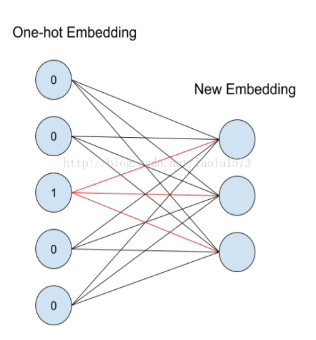
    https://blog.csdn.net/liangjiubujiu/article/details/79690821
    
5. tf.layers.conv1d: 利用卷积核对输入数据进行卷积，输出张量。
    重要的参数 input（输入张量）,filters（卷积核个数）,kernel_size（卷积核大小）
    https://www.jianshu.com/p/456fe7db637d
6. tf.layers.dense: 密集连接(Densely-connected)层类.
    https://www.jianshu.com/p/73a9742dc9e3

## 搭建神经网络

In [6]:
'''
vocabulary_size = 10000 ## 词汇表大小
sequence_length = 600 ## 序列长度
embedding_size = 64 ## 词向量维度
num_filters = 256 ## 卷积核数目
num_fc_units = 128 ## 全连接层神经元
dropout_keep_probability = 0.5 ## dropout 保留比例
learning_rate = 1e-3 ## 学习率
batch_size = 64 ## 每批训练大小

'''

### 调用tf.get_variable 方法实例化可以更新的模型参数embedding
### 矩阵形状为vocab_size*embedding_size（10000*64）
embedding = tf.get_variable('embedding', [vocabulary_size, embedding_size])

### 调用tf.nn库的embedding lookup 方法将输入数据做词嵌入，得到新变量。
### embedding_inputs形状为batch_size * sequence_length*embedding_size(64*600*64)
embedding_inputs = tf.nn.embedding_lookup(embedding, X_holder)

## 调用tf.layers.conv1d方法（3个参数：1 输入数据，2 卷积核数量，3 卷积核大小此处是5）
## 方法结果赋值为变量conv，形状为batch_size * 596 * num_filters (596=600-5+1)
conv = tf.layers.conv1d(embedding_inputs, num_filters, filter_size)

## 调用tf.reduce_max 方法对conv的第一个维度做求最大值操作，
## 方法结果赋值给变量max_pooling形状为batch_size * num_filter(64*256)
max_pooling = tf.reduce_max(conv, [1])

## 添加全连接层。
## tf.layers.dense 方法结果赋值给变量full_connect，形状为batch_size * num_fc_units（64*128）
full_connect = tf.layers.dense(max_pooling, num_fc_units) ##没有使用激活函数

##调用tf.contrib.layers.dropout方法（2个参数：1 输入数据，2保留比例）
full_connect_dropout = tf.contrib.layers.dropout(full_connect, keep_prob = dropout_keep_probability)

## 调用tf.nn.relu 方法即激活函数
full_connect_activate = tf.nn.relu(full_connect_dropout)

## 添加全连接层，tf.layers.dense 方法结果赋值给变量softmax_before 形状为batch_size * num_classes 即64*14
softmax_before = tf.layers.dense(full_connect_activate, num_classes)

## 调用tf.nn.softmax方法，预测概率值
predict_Y = tf.nn.softmax(softmax_before)

## 使用交叉熵作为损失函数
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_holder, logits=softmax_before)
loss = tf.reduce_mean(cross_entropy)

## 调用 tf.train.AdamOptimizer方法定义优化器optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)

## 最小化损失
train = optimizer.minimize(loss)

## 计算预测准确率
isCorrect = tf.equal(tf.argmax(Y_holder, 1), tf.argmax(predict_Y, 1))
accuracy = tf.reduce_mean(tf.cast(isCorrect, tf.float32))

W0726 16:28:20.096875 25432 deprecation.py:506] From C:\Users\lijie4\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 16:28:20.113876 25432 deprecation.py:323] From <ipython-input-6-a0382b224469>:23: conv1d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.
W0726 16:28:20.229251 25432 deprecation.py:323] From <ipython-input-6-a0382b224469>:31: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


## 参数初始化
对于神经网络模型，重要的是其中的参数，开始神经网络模型训练之前，需要做参数初始化。

In [29]:
## 调用tf.global_variables_initializer 实例化tensorflow 中的operation对象
init = tf.global_variables_initializer()
## 实例化会话对象
session = tf.Session()
## 变量初始化
session.run(init)

## 模型训练

In [30]:
## 获取测试集中的数据
test_idList_list = [content2idList(content) for content in test_content_list]
test_X = kr.preprocessing.sequence.pad_sequences(test_idList_list, sequence_length)
test_y = labelEncoder.transform(test_label_list)
test_Y = kr.utils.to_categorical(test_y, num_classes)

import random
## 模型迭代训练20000次
startTime = time.time()
for i in range(20000):
    ## 从训练集中选取batch_size 大小，即64个样本做批量梯度下降
    selected_index = random.sample(list(range(len(train_y))), k=batch_size)
    batch_X = train_X[selected_index]
    batch_Y = train_Y[selected_index]
    ## 每运行一次，表示模型训练1次
    session.run(train, {X_holder:batch_X, Y_holder: batch_Y})
    step = i + 1
    ## 每间隔100步打印
    if step % 100 == 0:
        ## 从测试集中选取200个样本，计算损失值和准确率
        selected_index = random.sample(list(range(len(test_y))), k=200)
        batch_X = test_X[selected_index]
        batch_Y = test_Y[selected_index]
        loss_value, accuracy_value = session.run([loss, accuracy], {X_holder: batch_X, Y_holder: batch_Y})
        print('step : %d loss: %.4f accuracy: %.4f' % (step, loss_value, accuracy_value))
print('cost time:', time.time() - startTime)

step : 100 loss: 1.5695 accuracy: 0.5100
step : 200 loss: 1.0693 accuracy: 0.7000
step : 300 loss: 0.8071 accuracy: 0.7550
step : 400 loss: 0.7119 accuracy: 0.7850
step : 500 loss: 0.4311 accuracy: 0.8800
step : 600 loss: 0.4480 accuracy: 0.8700
step : 700 loss: 0.4538 accuracy: 0.8800
step : 800 loss: 0.4243 accuracy: 0.8700
step : 900 loss: 0.4352 accuracy: 0.8550
step : 1000 loss: 0.3882 accuracy: 0.8900
step : 1100 loss: 0.4073 accuracy: 0.8900
step : 1200 loss: 0.5366 accuracy: 0.8350
step : 1300 loss: 0.3137 accuracy: 0.9150
step : 1400 loss: 0.3297 accuracy: 0.9200
step : 1500 loss: 0.3805 accuracy: 0.8800
step : 1600 loss: 0.4396 accuracy: 0.8750
step : 1700 loss: 0.4250 accuracy: 0.8850
step : 1800 loss: 0.4710 accuracy: 0.8700
step : 1900 loss: 0.2660 accuracy: 0.9450
step : 2000 loss: 0.3788 accuracy: 0.9200
step : 2100 loss: 0.3712 accuracy: 0.8950
step : 2200 loss: 0.2969 accuracy: 0.9100
step : 2300 loss: 0.2962 accuracy: 0.9300
step : 2400 loss: 0.3620 accuracy: 0.8950
s

step : 19500 loss: 0.2286 accuracy: 0.9500
step : 19600 loss: 0.2287 accuracy: 0.9250
step : 19700 loss: 0.2953 accuracy: 0.9100
step : 19800 loss: 0.3021 accuracy: 0.9250
step : 19900 loss: 0.2185 accuracy: 0.9300
step : 20000 loss: 0.1698 accuracy: 0.9500


## 模型测试

In [34]:
import warnings
warnings.filterwarnings('ignore')
def predict(input_content):
    ## idList的数据类型必须是列表list， 否则调用kr.preprocessing.sequence.pad_sequences方法会报错
    idList = [content2idList(input_content)]
    X = kr.preprocessing.sequence.pad_sequences(idList, sequence_length)
    Y = session.run(predict_Y, {X_holder: X})
    y = np.argmax(Y, axis=1)
    label = labelEncoder.inverse_transform(y)[0]
    return label

selected_index = random.sample(range(len(test_content_list)), k=1)[0]
selected_sample = test_content_list[selected_index]
true_label = test_label_list[selected_index]
predict_label = predict(selected_sample)
print('selected_sample:', selected_sample)
print('true_label:', true_label)
print('predict_label:', predict_label, '\n')
print('predict whatever you want, for example:')
input_content = '足球篮球'
print('predict("%s"):' % input_content, predict(input_content))



selected_sample: 铁道部部署全路防洪检查整治安全隐患 中新网3月22日电 据铁道部网站消息，铁道部3月18日召开全路防洪工作电视电话会议指出，今年全路防洪形势依然极为严峻，铁道部要求各铁路局提前做好抗洪抢险准备工作。 2010年汛期，全国范围内连续水害、大型水害多。各铁路局按照铁道部的统一部署，切实加强组织领导，严格落实汛期安全行车措施。广大干部职工顽强拼搏、不怕疲劳，全面排查，防洪工作取得较好成绩。 会议明确了今年防洪工作的总体要求：以确保列车安全、确保旅客生命财产安全、确保运输秩序为核心，牢固树立“安全第一、预防为主、综合整治”的指导思想，以全面排查、重点整治、严防死守、应急处置为主线，科学防洪、全年防洪、全员防洪，全力推进铁路防洪工作向主动防范、常态管理转变，杜绝客货列车责任水害事故，杜绝因水害造成的旅客伤亡事故，最大限度地减少水害断道时间。 会议指出，今年全路防洪工作任务艰巨、责任重大。铁道部要求各铁路局提前做好抗洪抢险准备工作，并重点做好以下几方面工作。 一是深入开展防洪安全大检查。各铁路局要成立防洪检查领导小组，实行记名检查，切实落实检查责任。 二是大力整治防洪安全隐患。对于今年防洪专项整治项目，各铁路局要明确责任，整治重点，加强管理，做好资金配套，加强检查督导。 三是进一步细化防洪预案。各主要行车部门应针对本专业特点，制订符合本部门工作实际的防洪应急预案，并确保预案一旦启动，抢险人员、料具、后勤保障能及时到位。 四是切实加强对防洪关键地点和关键时段的检查监控。要继续严格落实去年铁道部专门下发的关于加强防洪地点管理的办法。 五是严格执行雨量警戒制度。遇有灾害性天气，各级防洪办要将沿线具体雨情及时通报各行车主要部门，及时发布雨情预警通知，提出有针对性的指导意见。 六是认真做好雨情监测和预报预警工作。各铁路局要及时通过卫星云图、雷达图等现代气象信息技术，动态掌握雨情变化，及早作出应急防范对策。 七是切实做好新线的防洪工作。 八是努力提高科学防洪技术水平。各铁路局要加快新技术、新手段的应用，进一步加强病害监测监控，严密防范突发灾害。 九是强化组织领导和责任落实。要严格落实“以雨为令，有水害就有领导干部在现场指挥”的防洪首长责任制。 
true_label: 时政
predict_label: 时政 

predict whatever you 

## 混淆矩阵

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def predictAll(test_X, batch_size=100):
    predict_value_list = []
    for i in range(0, len(test_X), batch_size):
        selected_X = test_X[i:i + batch_size]
        predict_value = session.run(predict_Y,{X_holder: selected_X})
        predict_value_list.extend(predict_value)
    return np.array(predict_value_list)

Y = predictAll(test_X)
y = np.argmax(Y, axis=1)

predict_label_list = labelEncoder.inverse_transform(y)
pd.DataFrame(confusion_matrix(test_label_list, predict_label_list), columns=labelEncoder.classes_, index=labelEncoder.classes_)


,体育,娱乐,家居,彩票,房产,教育,时尚,时政,星座,游戏,社会,科技,股票,财经
体育,32127,234,17,124,6,31,22,71,9,20,61,74,25,4
娱乐,160,22160,78,0,8,64,122,112,36,63,171,285,30,10
家居,10,103,7372,1,63,32,98,23,22,15,33,183,59,7
彩票,100,5,1,1721,5,5,2,6,2,3,34,7,4,3
房产,5,28,94,0,4541,16,7,43,5,2,42,40,169,25
教育,23,86,56,3,10,9542,34,215,36,27,256,162,34,18
时尚,9,95,80,0,1,13,2982,11,26,6,17,48,1,2
时政,78,133,45,6,38,135,28,14399,3,11,313,328,313,51
星座,2,16,20,0,2,24,31,4,781,14,7,9,1,1
游戏,27,40,15,0,1,15,28,10,11,5469,11,504,9,1


## 报告表

In [36]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def eval_model(y_true, y_pred, labels):
    # 计算每个分类的Precision, Recall, f1, support
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred)
    # 计算总体的平均Precision, Recall, f1, support
    tot_p = np.average(p, weights=s)
    tot_r = np.average(r, weights=s)
    tot_f1 = np.average(f1, weights=s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label': labels,
        u'Precision': p,
        u'Recall': r,
        u'F1': f1,
        u'Support': s
    })
    res2 = pd.DataFrame({
        u'Label': ['总体'],
        u'Precision': [tot_p],
        u'Recall': [tot_r],
        u'F1': [tot_f1],
        u'Support': [tot_s]
    })
    res2.index = [999]
    res = pd.concat([res1, res2])
    return res[['Label', 'Precision', 'Recall', 'F1', 'Support']]

eval_model(test_label_list, predict_label_list, labelEncoder.classes_)

,Label,Precision,Recall,F1,Support
0,体育,0.983500,0.978736,0.981112,32825
1,娱乐,0.941416,0.951114,0.946240,23299
2,家居,0.904762,0.919087,0.911868,8021
3,彩票,0.892172,0.906744,0.899399,1898
4,房产,0.922780,0.905123,0.913866,5017
5,教育,0.916267,0.908589,0.912412,10502
6,时尚,0.862598,0.906108,0.883817,3291
7,时政,0.881859,0.906681,0.894098,15881
8,星座,0.824710,0.856360,0.840237,912
9,游戏,0.903668,0.890572,0.897072,6141


In [37]:
session.close()

模型训练 5000 次时， 总体的 P: 0.913, R: 0.913, F1: 0.913, Support: 209019

模型训练 10000 次时，总体的 P: 0.922, R: 0.921, F1: 0.922, Support: 209019

模型训练 20000 次时，总体的 P: 0.926, R: 0.926, F1: 0.926, Support: 209019

系统配置： windows 10, tensorflow 1.14, CUDA: 10.0. Memory: 16G, Disk: 240G, GPU-0:Intel, GPU-1:NVIDIA Quadro M1200
训练过程中：
Memory: 占用了8G, GPU 33%
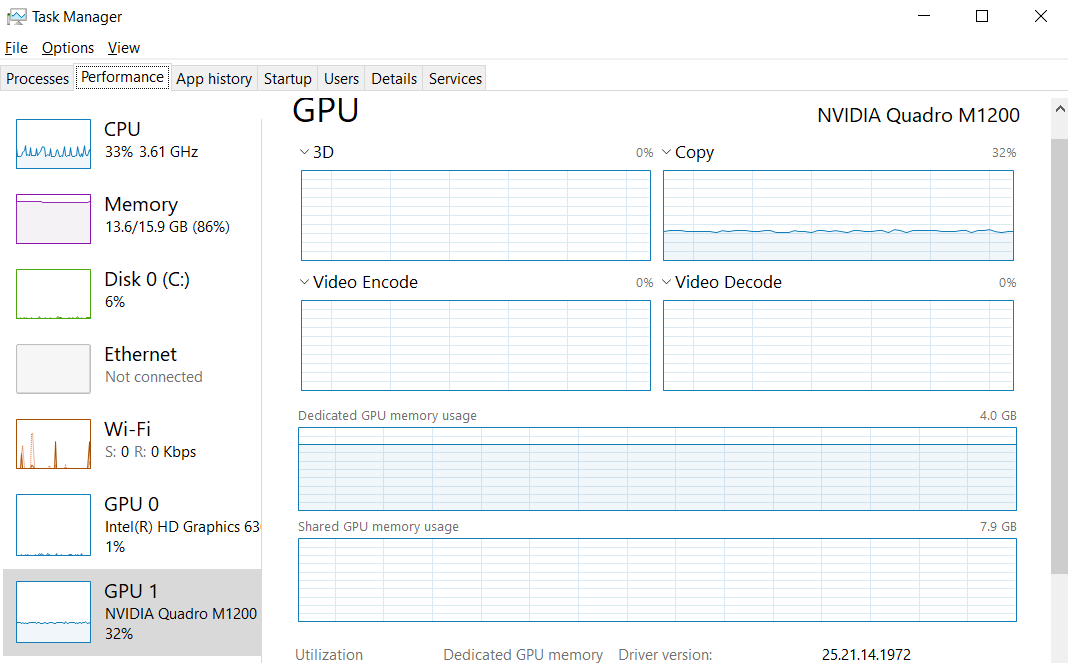
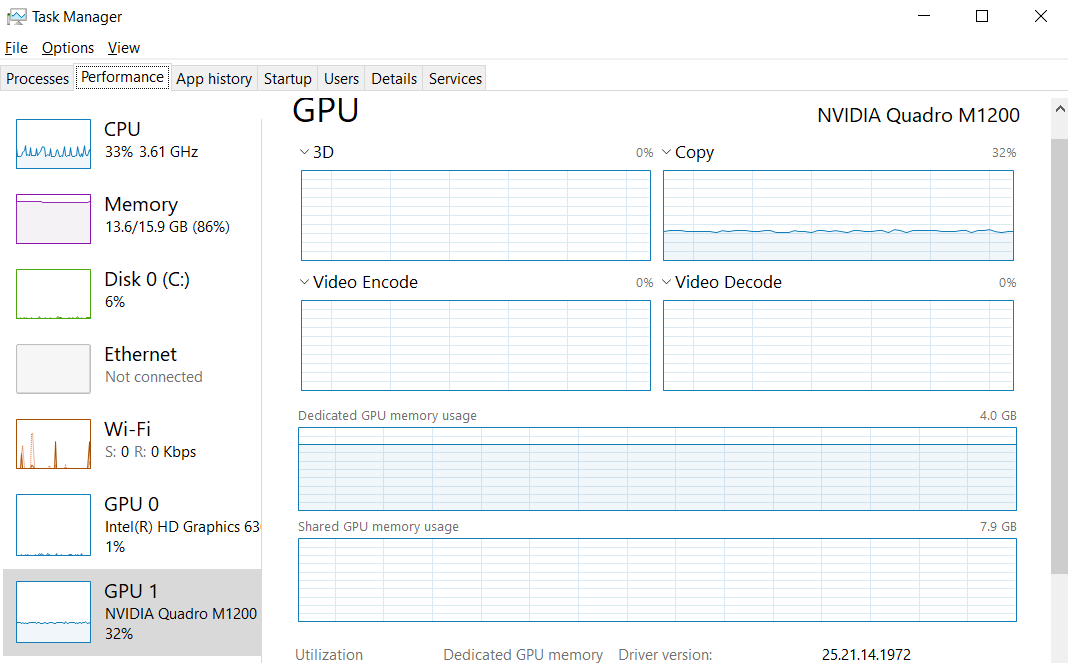